In [124]:
import pandas as pd
from pandas import DataFrame as df
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# Before Crisis

Cek delay IHSG terhadap DJI

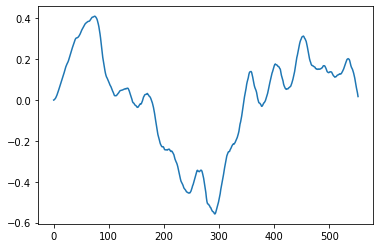

In [210]:
data1=pd.read_excel('./IHSG_cut.xlsx')
data2=pd.read_excel('./DJI_cut.xlsx')
close1=np.array(data1['close'])
close2=np.array(data2['close'])
t=np.linspace(0,276,277)
a=close1
b=close2
a = (a - np.mean(a)) / (np.std(a) * len(a))
b = (b - np.mean(b)) / (np.std(b))
rab = np.correlate(a, b, 'full')
plt.plot(rab)

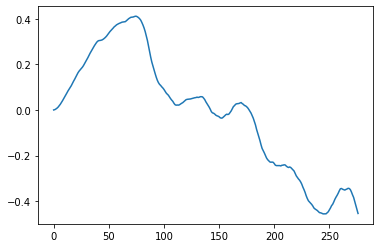

In [211]:
#Bagian dari korelasi ini menunjukkan bagaimana delay respon output DJI terhadap IHSG sebagai input
c_ihsg_input = np.correlate(a, b, 'full')[0:277]
plt.plot(t,c_ihsg_input)

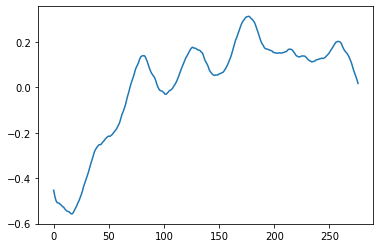

In [212]:
#Bagian dari korelasi ini menunjukkan bagaimana delay respon output IHSG terhadap DJI sebagai input
c_dji_input = np.correlate(a, b, 'full')[276:276+277]
plt.plot(t,c_dji_input)

Karena indeks yang kita target adalah IHSG, kita gunakan DJI sebagai input. Didapatkan bahwa delay

In [213]:
np.where(c_dji_input==c_dji_input.min())

(array([16], dtype=int64),)

In [214]:
c_dji_input[16]

-0.5575644289296959

16 ini adalah delay respon IHSG terhadap DJI selama tidak krisis, terlihat respon yang menarik bahwa pergerakan IHSG cenderung negatif jika DJI positif pada delay 16 hari. Postulat bahwa IHSG dan DJI bergerak relatif bersamaan tidak terjadi

# After Crisis

Cek delay IHSG terhadap DJI

(array([23], dtype=int64),)

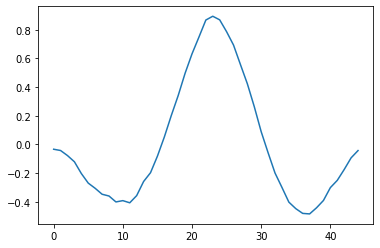

In [200]:
data1=pd.read_excel('./IHSG_crisis.xlsx')
data2=pd.read_excel('./DJI_crisis.xlsx')
close1=np.array(data1['close'])
close2=np.array(data2['close'])
t=np.linspace(0,len(close1)-1,len(close1))
a_crisis=close1
b_crisis=close2
a_crisis = (a_crisis - np.mean(a_crisis)) / (np.std(a_crisis) * len(a_crisis))
b_crisis = (b_crisis - np.mean(b_crisis)) / (np.std(b_crisis))
rab_crisis = np.correlate(a_crisis, b_crisis, 'full')
plt.plot(rab_crisis)
np.where(rab_crisis==rab_crisis.max())

(23,)

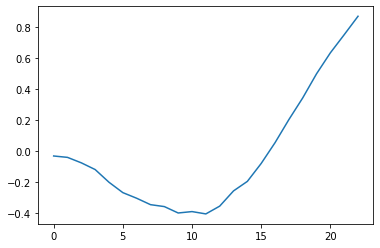

In [203]:
#Bagian dari korelasi ini menunjukkan bagaimana delay respon output DJI terhadap IHSG sebagai input saat krisis
c_ihsg_input_crisis = np.correlate(a_crisis, b_crisis, 'full')[0:23]
plt.plot(t,c_ihsg_input_crisis)
c_ihsg_input_crisis.shape

(23,)

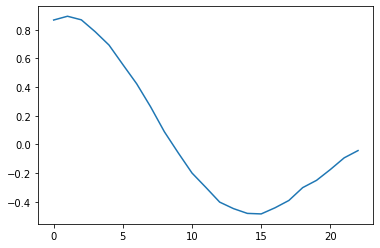

In [204]:
#Bagian dari korelasi ini menunjukkan bagaimana delay respon output IHSG terhadap DJI sebagai input saat krisis
c_dji_input_crisis = np.correlate(a_crisis, b_crisis, 'full')[22:]
plt.plot(t,c_dji_input_crisis)
c_dji_input_crisis.shape

In [206]:
np.where(c_dji_input_crisis==c_dji_input_crisis.max())

(array([1], dtype=int64),)

Terlihat delay yang cukup menarik, yaitu adalah 1 hari. Hal ini berarti DJI selalu mendahului pergerakan IHSG dengan korelasi 0.899 yang cukup besar untuk dibilang signifikan.

# Koherensi Komponen Frekuensi IHSG dan DJI Sebelum Krisis
Ini dilakukan untuk mengetahui SNR dengan asumsi sistem LTI dari signal input DJI terhadap output IHSG dengan model sistem sebagai berikut dengan x(t) adalah DJI, n(t) adalah noise, y(t) adalah IHSG, h(t) adalah sistem DJI-IHSG.
<img src="./SISO LTI DJI-IHSG.png">

Akan diambil sinyal-sinyal input yang memiliki noise cukup rendah terhadap output (atau juga bisa dibilang sinyal-sinyal yang linear terhadap output). Sinyal tersebut memiliki frekuensi-frekuensi tertentu yang hasil analisis koherensinya cukup baik, atau dapat diambil dalam kasus ini >0.9 untuk tingkat kepercayaan 90%. Dari frekuensi sinyal-sinyal tersebut, akan dilakukan pemodelan dengan deret fourier pada x(t) dan y(t) pada frekuensi tersebut untuk menentukan hubungan sistem h(t) yang linear dari x(t) DJI dan y(t) IHSG dengan noise n(t) diabaikan.

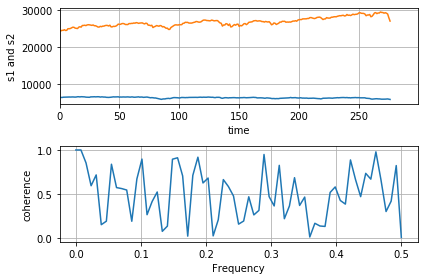

In [259]:
data1=pd.read_excel('./IHSG_cut.xlsx')
data2=pd.read_excel('./DJI_cut.xlsx')
close1=np.array(data1['close'])
close2=np.array(data2['close'])
dt = 1
fig, axs = plt.subplots(2, 1)
axs[0].plot(t, close1, t, close2)
axs[0].set_xlim(0, 299)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(close1, close2, Fs=1/dt, NFFT=128)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()

<img src="./FFT_eq.png" width="50%">

<img src="./FFT.png" width="50%">

Jadi ini data 300 hari, frekuensi sampling 1 per hari atau bisa dibilang 1 Hz kalau Hz nya dalam hari. $ f_s = 1 Hz $ Maka kalau pakai NFFT 128, didapat resolusi frekuensi 1/128 Hz = 0.0078125 Hz
$$
\Delta f = 0.0078125 Hz
$$
Terlihat penggunaan NFFT 128 lebih informatif karena menunjukkan peak pada frekuensi-frekuensi tertentu dibanding NFFT lain, dan pada 256, tidak dapat dilakukan analisis koherensi.

In [260]:
sys_freq=df(cxy)
sys_freq['f']=f
sys_freq['cxy']=cxy
sys_freq=sys_freq.drop(0,axis=1)
sys_freq.shape

(65, 2)

In [257]:
sys_freq = sys_freq.drop(sys_freq[sys_freq['cxy']<0.9].index)

In [249]:
sys_freq

,f,cxy
0,0.000000,0.998705
1,0.007812,0.998763
20,0.156250,0.910503
24,0.187500,0.917085
37,0.289062,0.947833
59,0.460938,0.977704


In [250]:
X_w=np.fft.fft(close1,128)

In [262]:
X_w

array([ 8.15560459e+05+0.00000000e+00j,  2.01900242e+03-9.62295983e+03j,
        4.01592059e+03+3.39341400e+03j, -5.06586010e+03+7.02002650e+02j,
        8.26869982e+02-2.28541631e+03j,  1.09634891e+03+1.84493331e+03j,
       -2.72296231e+03+6.35767249e+01j,  3.48298795e+02-1.24873257e+02j,
        1.39887892e+03+8.39921627e+02j, -9.07643596e+02-4.29491953e+02j,
       -9.86164398e+02-3.71542627e+02j,  5.28004163e+00+6.56552445e+02j,
       -6.70182945e+02+1.34192201e+02j,  1.70742474e+02+7.24336942e+02j,
        3.53575760e+02+2.20463857e+02j, -5.09154198e+02-5.66382538e+02j,
        3.74384908e+02+4.39208604e+01j, -2.79985814e+02+1.21500856e+03j,
       -9.20968964e+02-4.23445980e+02j,  1.05684340e+02-1.89814371e+02j,
        1.02301426e+02-1.28699094e+02j,  5.21282961e+00+2.32099810e+02j,
       -7.11843036e+02-3.91293075e+00j,  6.95410883e+01+1.84541653e+02j,
        1.63565185e+02-3.64245756e+01j,  1.60295442e+02-9.44293469e+01j,
       -5.21008220e+01+9.48305539e+01j, -5.78480808

In [267]:
np.exp(-1000000000000)

0.0